# Постобработка

In [4]:
import pandas as pd

dinis_df = pd.read_csv('/content/drive/MyDrive/nlp/Динислам.csv', sep=None)
my_df = pd.read_csv('/content/drive/MyDrive/nlp/моя часть.csv', sep=None)
olya_df = pd.read_csv('/content/drive/MyDrive/nlp/Оля.csv', sep=None)

dinis_df.insert(10, 'Лишнее', False)
olya_df.insert(10, 'Лишнее', False)

<ipython-input-4-51a195d716cc>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  dinis_df = pd.read_csv('/content/drive/MyDrive/nlp/Динислам.csv', sep=None)
<ipython-input-4-51a195d716cc>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  my_df = pd.read_csv('/content/drive/MyDrive/nlp/моя часть.csv', sep=None)
<ipython-input-4-51a195d716cc>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  olya_df = pd.read_csv('/content/drive/MyDrive/nlp/Оля.csv', sep=None)


In [5]:
dinis_df.drop(1, inplace=True)
olya_df.drop([0, 1], inplace=True)

In [6]:
merged_df = pd.concat([my_df, dinis_df, olya_df], axis = 0, ignore_index=True)

In [7]:
merged_df.shape

(2386, 15)

In [8]:
import pandas as pd

# df = pd.read_csv('/content/drive/MyDrive/nlp/моя часть.csv', sep='/t')

merged_df.fillna(False, inplace=True)

drop_columns = ['annotation_id','annotator','created_at','lead_time','updated_at']
merged_df = merged_df.drop(columns=drop_columns)

def sentiment_proceed(index, df):
  import json

  row = df['sentiment'].values[index]
  try:
    sen_dict =  json.loads(row)
    choices = sen_dict['choices']
  except json.JSONDecodeError:
    choices = [row]
  return choices

for index, row in merged_df.iterrows():
  value_to_fill = sentiment_proceed(index, merged_df)
  for value in value_to_fill:
    merged_df.loc[index, value] = True

<ipython-input-8-c1a6e8d33a79>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_df.fillna(False, inplace=True)
<ipython-input-8-c1a6e8d33a79>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df.fillna(False, inplace=True)


In [9]:
merged_df.head()

,comment,id,rating,sentiment,Вопрос решен,Лишнее,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки
0,спасибо,2945792,5,Понравилось выполнение заявки,False,False,False,False,False,True
1,спасибо!,3234340,5,Понравилось выполнение заявки,False,False,False,False,False,True
2,Отлично,3380332,5,Понравилось выполнение заявки,False,False,False,False,False,True
3,Благодарю за оперативное решение проблемы !,3381812,5,"{""choices"":[""Нравится скорость отработки заяво...",True,False,False,False,True,False
4,Прекрасный специалист! Побольше таких,3461991,5,Нравится качество работы сотрудников,False,False,False,True,False,False


In [10]:
merged_df = merged_df.drop(columns='sentiment')

In [11]:
int_categories = (merged_df.iloc[0::, 3::]).astype(int)
merged_df = pd.concat([merged_df.iloc[0::, 0:3], int_categories], axis=1)


In [12]:
merged_df.drop_duplicates(subset=['comment'], inplace=True, ignore_index=True, keep='last')

In [ ]:
merged_df.shape

(1815, 9)

In [13]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.5 MB/s eta 0:00:00


In [14]:
import emoji

for index, row in enumerate(merged_df['comment']):
  # print(index, row)
  merged_df['comment'] = merged_df['comment'].replace(merged_df['comment'][index], (emoji.demojize(merged_df['comment'][index], language='ru')))

In [15]:
merged_df.to_csv('/content/drive/MyDrive/nlp/самая общая постобработка.csv')

# Баланс классов

In [16]:
model_df = pd.read_csv('/content/drive/MyDrive/nlp/самая общая постобработка.csv')
model_df.head()

,Unnamed: 0,comment,id,rating,Вопрос решен,Лишнее,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки
0,0,Благодарю за оперативное решение проблемы !,3381812,5,1,0,0,0,1,0
1,1,спасибо управляющей компании за то что присла...,3627490,5,0,0,0,1,1,0
2,2,Решили мой вопрос. Спасибо!,3695420,5,1,0,0,0,0,1
3,3,Все исправили,3726842,5,1,0,0,0,0,0
4,4,спасибо большое! теперь не скрипят,3751364,5,0,0,1,0,0,1


In [17]:
model_df = model_df.drop(columns='Unnamed: 0')

In [18]:
marks_column = model_df.iloc[0::, 3::].columns

class_balance = pd.DataFrame({
    'marks' : [column for column in model_df.iloc[0::, 3::].columns],
    'count' : [((model_df[column] == 1).sum()) for column in model_df.iloc[0::, 3::].columns]
})

In [ ]:
class_balance

,marks,count
0,Вопрос решен,755
1,Лишнее,265
2,Нравится качество выполнения заявки,210
3,Нравится качество работы сотрудников,360
4,Нравится скорость отработки заявок,704
5,Понравилось выполнение заявки,477


Распределение меток (одиночных)

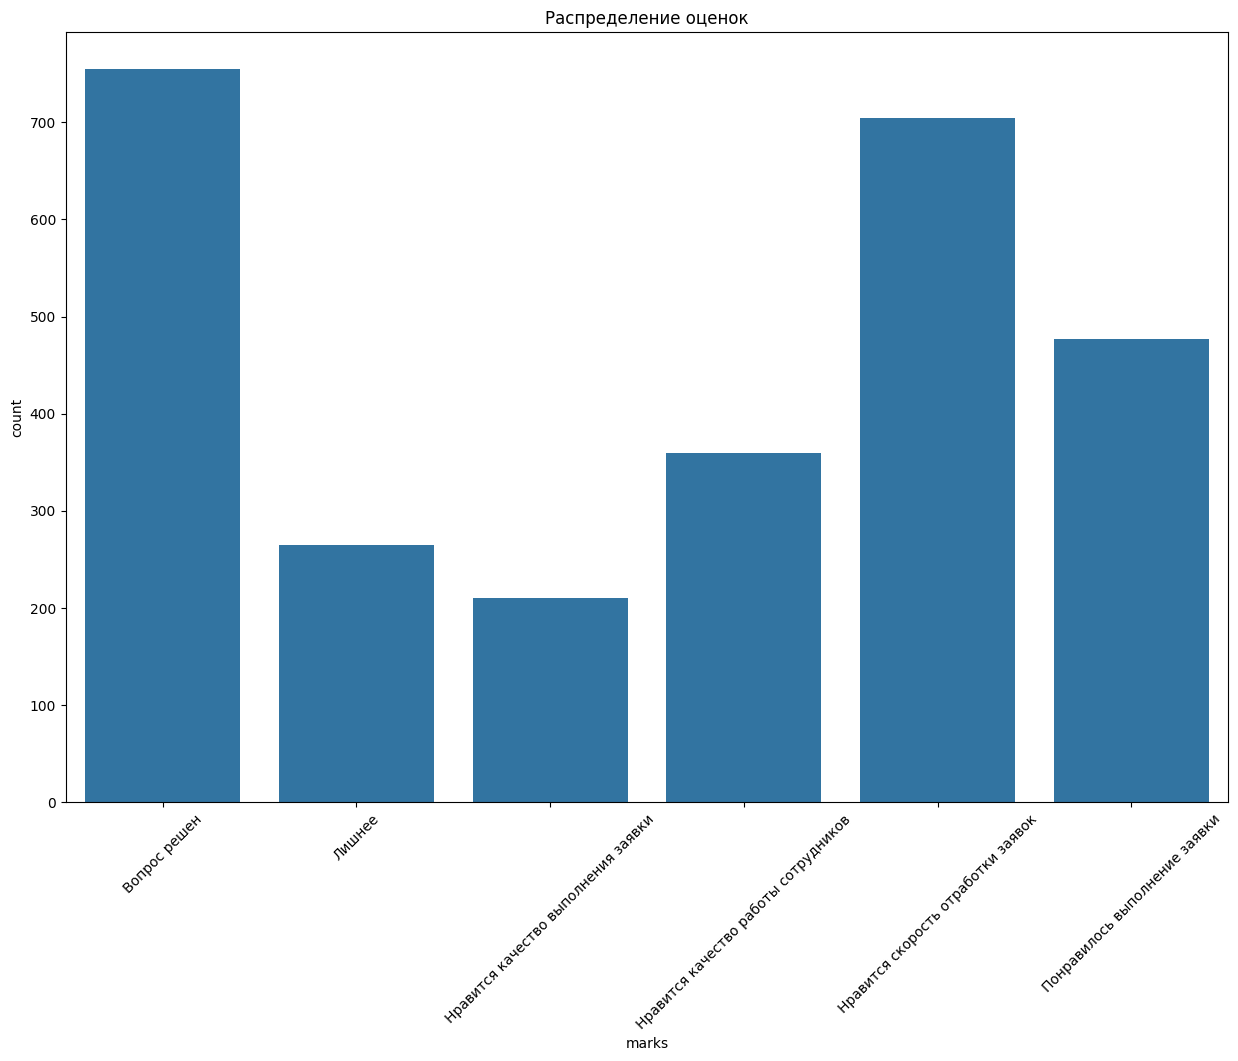

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.barplot(x='marks', y='count', data=class_balance, width=0.8)
plt.title('Распределение оценок')
plt.xticks(rotation=45)
plt.show()

Распределение комбинаций меток

Всего (поскольку есть 6 меток) возможны 63 случая их комбинаций, но в датасете может быть меньше

⚠️Значит необходимо выделить наиболее частые комбинации

In [20]:
marks_df = model_df[marks_column]

In [21]:

marks_column = model_df.iloc[0::, 3::].columns

marks_df = model_df[marks_column]

combs = marks_df.apply(lambda row: tuple(marks_df.columns[row==1].to_list()), axis=1)

c_col = (
    combs.value_counts()
    .reset_index()
    .rename(columns={
        'index': 'combined_marks',
        0: 'count'
    })
)

In [22]:
combs_all = marks_df.apply(
    lambda row: tuple(marks_df.columns[row == 1].tolist()),
    axis=1
)


c_col_all = pd.DataFrame({'combined_marks': combs_all})


c_col_all

,combined_marks
0,"(Вопрос решен, Нравится скорость отработки зая..."
1,"(Нравится качество работы сотрудников, Нравитс..."
2,"(Вопрос решен, Понравилось выполнение заявки)"
3,"(Вопрос решен,)"
4,"(Нравится качество выполнения заявки, Понравил..."
...,...
1810,"(Понравилось выполнение заявки,)"
1811,"(Нравится качество выполнения заявки, Нравится..."
1812,"(Лишнее,)"
1813,"(Лишнее,)"


In [23]:
from collections import defaultdict

index_column = defaultdict(list) #  словарь с списком где хранятся индексы как значения а ключи это сами комбинации

for index, row in c_col_all.iterrows():
  print(index, row['combined_marks'])
  index_column[row['combined_marks']].append(index)

0 ('Вопрос решен', 'Нравится скорость отработки заявок')
1 ('Нравится качество работы сотрудников', 'Нравится скорость отработки заявок')
2 ('Вопрос решен', 'Понравилось выполнение заявки')
3 ('Вопрос решен',)
4 ('Нравится качество выполнения заявки', 'Понравилось выполнение заявки')
5 ('Нравится скорость отработки заявок',)
6 ('Понравилось выполнение заявки',)
7 ('Нравится качество работы сотрудников',)
8 ('Нравится качество работы сотрудников',)
9 ('Вопрос решен', 'Нравится скорость отработки заявок')
10 ('Нравится качество выполнения заявки', 'Нравится качество работы сотрудников', 'Нравится скорость отработки заявок', 'Понравилось выполнение заявки')
11 ('Нравится качество выполнения заявки', 'Нравится скорость отработки заявок', 'Понравилось выполнение заявки')
12 ('Понравилось выполнение заявки',)
13 ('Лишнее',)
14 ('Вопрос решен', 'Нравится качество работы сотрудников', 'Нравится скорость отработки заявок', 'Понравилось выполнение заявки')
15 ('Вопрос решен', 'Нравится качество 

In [24]:
import numpy as np


RARE_THRESHOLD = 60

rare_classes = {k: v for k, v in index_column.items() if len(v) < RARE_THRESHOLD}
common_classes = {k: v for k, v in index_column.items() if len(v) >= RARE_THRESHOLD}

# Собираем индексы для каждой выборки
train_indices = []
valid_indices = []

# все редкие классы идут в train
for indices in rare_classes.values():
    train_indices.extend(indices)

# распределяем частые классы в пропорции 60/40
for indices in common_classes.values():
    np.random.shuffle(indices)
    split_idx = int(0.6 * len(indices))
    train_indices.extend(indices[:split_idx])
    valid_indices.extend(indices[split_idx:])

In [26]:
c_col

,combined_marks,count
0,"(Лишнее,)",265
1,"(Вопрос решен,)",257
2,"(Понравилось выполнение заявки,)",228
3,"(Нравится скорость отработки заявок,)",223
4,"(Вопрос решен, Нравится скорость отработки зая...",171
5,"(Нравится качество работы сотрудников,)",138
6,"(Вопрос решен, Понравилось выполнение заявки)",60
7,"(Нравится скорость отработки заявок, Понравило...",54
8,"(Вопрос решен, Нравится качество работы сотруд...",51
9,"(Нравится качество выполнения заявки, Нравится...",50


In [27]:
train_data = model_df.loc[train_indices]  # Получить строки по индексам train_indices
valid_data = model_df.loc[valid_indices]

In [28]:
train_data

,comment,id,rating,Вопрос решен,Лишнее,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки
1,спасибо управляющей компании за то что присла...,3627490,5,0,0,0,1,1,0
94,"Быстро, мастеру большое спасибо",3892659,5,0,0,0,1,1,0
128,"Лика, спасибо Вам за оперативный ответ и подро...",3895634,5,0,0,0,1,1,0
233,"Спасибо электрику, оперативно пришёл!",3905786,5,0,0,0,1,1,0
303,Менеджеру Наталье и дежурного сантехнику 09.0...,3911553,5,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
903,вопрос за декабрь сумма более 12 т.р из-за чег...,4233537,5,0,1,0,0,0,0
1712,"соседи так и хранят вещи , а лист был просто п...",4165770,5,0,1,0,0,0,0
1430,"приложение нужно дорабатывать ,сами пишите что...",4195981,5,0,1,0,0,0,0
1094,сделанно не аккуратно.торчат резинки .,4218409,5,0,1,0,0,0,0


In [ ]:
valid_data

,comment,id,rating,Вопрос решен,Лишнее,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки
753,Все отлично! Специалист пришёл через 30 минут ...,3949394,5,1,0,0,0,1,0
207,"Большое спасибо , оперативно поставили огранич...",3903349,5,1,0,0,0,1,0
71,Вопрос решился быстро. Спасибо!,3890604,5,1,0,0,0,1,0
323,Быстро решили проблему! Спасибо!,3912279,5,1,0,0,0,1,0
951,оперативно и быстро! супер всегда бы так,4228411,5,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1812,два дня мусоропровод. сегодня с утра тоже,3296403,5,0,1,0,0,0,0
1804,резиновые прокладки в окнах заменены частично....,3810992,5,0,1,0,0,0,0
838,"надеюсь и причину устранили, а то после первог...",3835874,5,0,1,0,0,0,0
1210,проблема пока не решена. рано оценивать,4210956,5,0,1,0,0,0,0


# Статистика

**1. Облако слов**


Облако слов по всем комментариям.

по каждой категории отдельно

https://www.kaggle.com/code/anandhuh/word-cloud-in-python-for-beginners

# Модель и настройка весов

In [ ]:
# https://habr.com/ru/articles/704592/


In [29]:
!pip install transformers
!pip install datasets
!pip install torch
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer, DataCollatorWithPadding, TextClassificationPipeline
from datasets import Dataset, DatasetDict
import pandas as pd
import evaluate
import numpy as np
from sklearn.model_selection import train_test_split
import torch


Стратификация датасета

In [ ]:


train_data = Dataset.from_pandas(train_data)
valid_data = Dataset.from_pandas(valid_data)

dataset = DatasetDict({
    'train': train_data,
    'valid': valid_data
    }
)

label_columns = list(dataset["train"].features.keys())[3:-1]

tokenizer = AutoTokenizer.from_pretrained('FacebookAI/xlm-roberta-base')

model = AutoModelForSequenceClassification.from_pretrained('FacebookAI/xlm-roberta-base',
                                                           num_labels=len(label_columns),
                                                           problem_type="multi_label_classification")

def tokenize(examples):
    tokenized = tokenizer(
        examples['comment'],
        padding='max_length',
        truncation=True,
        max_length=512,
        return_tensors='np'  # Явно указываем возврат numpy массивов
    )

    # Подготовка меток
    labels = np.zeros((len(examples['comment']), len(label_columns)), dtype=np.float32)
    for i, col in enumerate(label_columns):
        labels[:, i] = np.array(examples[col], dtype=np.float32)

    tokenized['labels'] = labels
    return tokenized

mapped_dataset = dataset.map(tokenize, batched=True)

metric = evaluate.load('roc_auc', 'multilabel')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/1275 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

In [ ]:
print(model)

XLMRobertaForSequenceClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=

In [ ]:
from sklearn.metrics import roc_auc_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    # Приводим labels к float32 для согласованности
    labels = labels.astype(np.float32)  # Важно!

    probabilities = 1 / (1 + np.exp(-logits))
    return {
        "roc_auc": roc_auc_score(labels, probabilities, average='macro')
    }


training_args = TrainingArguments(
        output_dir='/content/drive/MyDrive/nlp/',
        eval_strategy='epoch',
        save_strategy='epoch',
        learning_rate=2e-5,
        per_device_train_batch_size=4,
        per_device_eval_batch_size=4,
        num_train_epochs=4,
        weight_decay=0.01,
        load_best_model_at_end=True,
        metric_for_best_model='roc_auc',
        report_to="none"



)

data_colator = DataCollatorWithPadding(tokenizer=tokenizer)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=mapped_dataset['train'],
    eval_dataset = mapped_dataset['valid'],
    compute_metrics=compute_metrics,
    processing_class=tokenizer,
    data_collator=data_colator

)

trainer.train()

Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss


https://www.kaggle.com/code/debarshichanda/bert-multi-label-text-classification

In [ ]:
model.classifier

XLMRobertaClassificationHead(
  (dense): Linear(in_features=768, out_features=768, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (out_proj): Linear(in_features=768, out_features=6, bias=True)
)

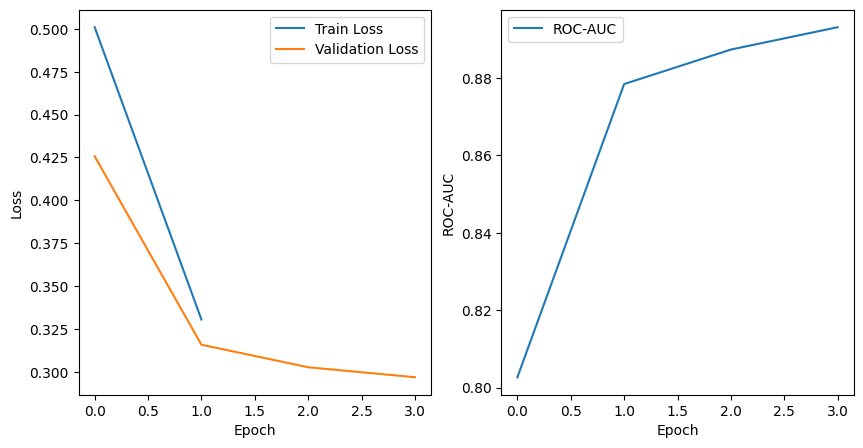

In [ ]:
import matplotlib.pyplot as plt

history = trainer.state.log_history

# Достаем loss и метрики
train_loss = [x['loss'] for x in history if 'loss' in x]
eval_loss = [x['eval_loss'] for x in history if 'eval_loss' in x]
roc_auc = [x['eval_roc_auc'] for x in history if 'eval_roc_auc' in x]

# График Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(eval_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График ROC-AUC
plt.subplot(1, 2, 2)
plt.plot(roc_auc, label='ROC-AUC')
plt.xlabel('Epoch')
plt.ylabel('ROC-AUC')
plt.legend()

plt.show()

# Предсказание

https://dzone.com/articles/how-to-train-evaluate-and-deploy-a-hugging-face-mo

Предсказывает нормально? Можно переходить к другой части

In [ ]:


comment_section = ['я люблю чай', 'я хочу спать', 'Алексей молодец!Все починил быстро и качесвтенно', 'Недоволен выполнением работ, лучше бы не делали', 'Качественнно и быстро, спасибо!', 'спасибо !!!!:)))))))))']

test_model_path = '/content/drive/MyDrive/nlp/checkpoint-1452'

test_tokenizer = AutoTokenizer.from_pretrained(test_model_path)

test_model = AutoModelForSequenceClassification.from_pretrained(test_model_path,
                                                           num_labels=len(label_columns),
                                                           problem_type="multi_label_classification")

pipeline = TextClassificationPipeline(model=test_model, tokenizer=test_tokenizer)

for comment in comment_section:
  print(pipeline(comment))


Device set to use cuda:0


[{'label': 'LABEL_1', 'score': 0.832272469997406}]
[{'label': 'LABEL_1', 'score': 0.9225544929504395}]
[{'label': 'LABEL_3', 'score': 0.9497791528701782}]
[{'label': 'LABEL_1', 'score': 0.7194239497184753}]
[{'label': 'LABEL_4', 'score': 0.9915848970413208}]
[{'label': 'LABEL_5', 'score': 0.5842408537864685}]
